In [1]:
import os
import ast
import wfdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras

sns.set_style('darkgrid')

In [2]:
PATH_TO_DATA = 'D:\\8th_sem\\nlp\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1'

ECG_df = pd.read_csv(os
                     .path.join(PATH_TO_DATA, 'ptbxl_database.csv'), index_col='ecg_id')
ECG_df.scp_codes = ECG_df.scp_codes.apply(lambda x: ast.literal_eval(x))
ECG_df.patient_id = ECG_df.patient_id.astype(int)
ECG_df.nurse = ECG_df.nurse.astype('Int64')
ECG_df.site = ECG_df.site.astype('Int64')
ECG_df.validated_by = ECG_df.validated_by.astype('Int64')

SCP_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'scp_statements.csv'), index_col=0)
SCP_df = SCP_df[SCP_df.diagnostic == 1]

ECG_df

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709,56.0,1,NaN,63.0,2,0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243,19.0,0,NaN,70.0,2,0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372,37.0,1,NaN,69.0,2,0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014,24.0,0,NaN,82.0,2,0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448,19.0,1,NaN,70.0,2,0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180,67.0,1,NaN,NaN,1,2,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703,93.0,0,NaN,NaN,1,2,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311,59.0,1,NaN,NaN,1,2,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [3]:
ECG_df.strat_fold.value_counts()

10    2203
3     2194
9     2193
2     2184
8     2179
7     2178
6     2178
1     2177
5     2176
4     2175
Name: strat_fold, dtype: int64

In [4]:
def diagnostic_class(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_class)
    return list(res)
                    
ECG_df['scp_classes'] = ECG_df.scp_codes.apply(diagnostic_class)

In [5]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

sampling_rate = 100

ECG_data = load_raw_data(ECG_df, sampling_rate, PATH_TO_DATA)

ECG_data.shape

(21837, 1000, 12)

In [6]:
sample = ECG_data[0]
print(sample.shape)

(1000, 12)


In [7]:
import neurokit2 as nk

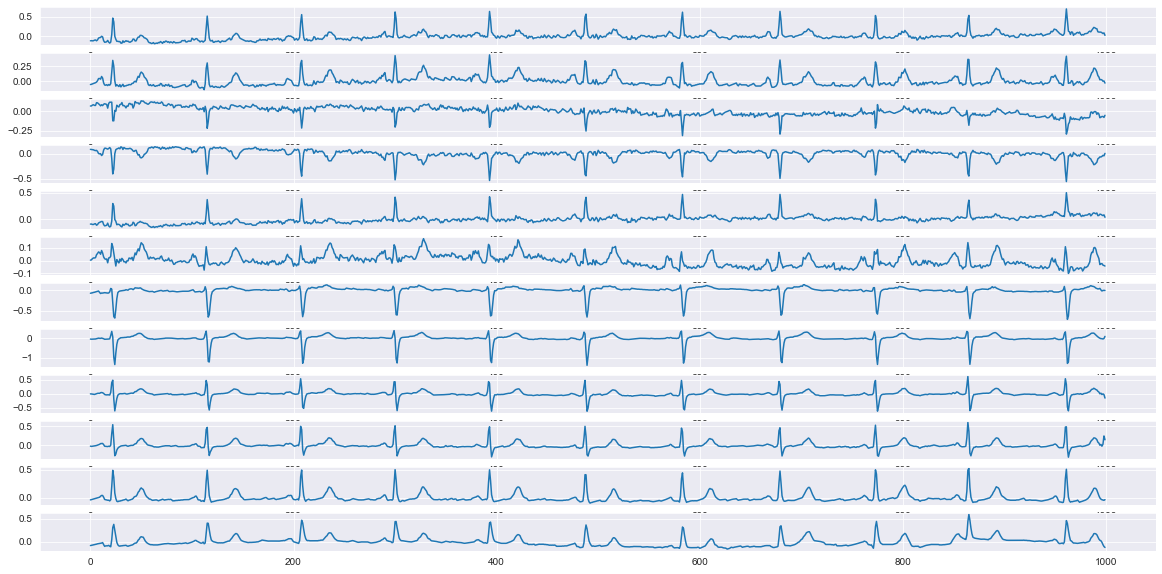

In [8]:
bar, axes = plt.subplots(sample.shape[1], 1, figsize=(20,10))
for i in range(sample.shape[1]):
    sns.lineplot(x=np.arange(sample.shape[0]), y=sample[:, i], ax=axes[i])
# plt.tight_layout()
plt.show()

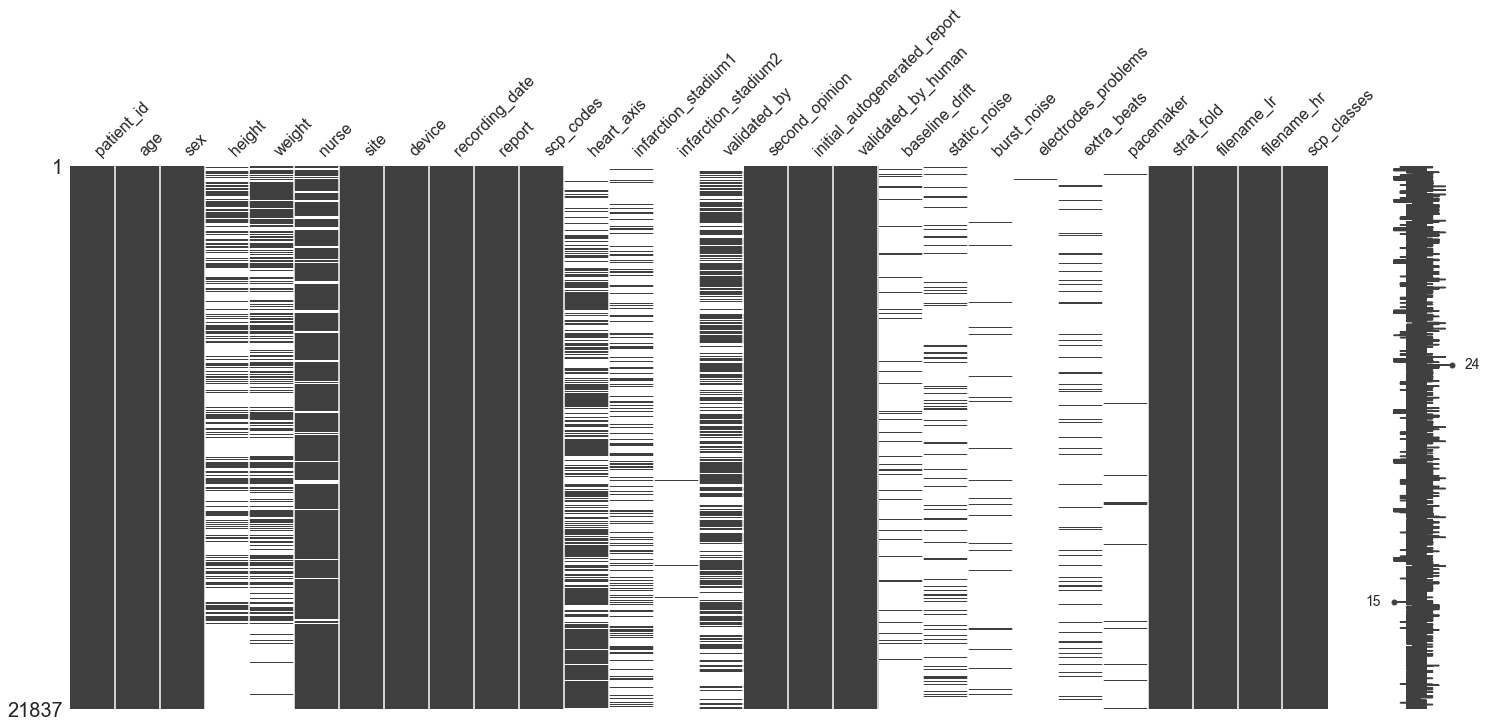

In [9]:
import missingno as msno

msno.matrix(ECG_df)
plt.show()

In [10]:
ECG_df[[col for col in ECG_df.columns if col not in ('scp_codes', 'scp_classes')]].nunique(dropna=True)

patient_id                      18885
age                                94
sex                                 2
height                             77
weight                            127
nurse                              12
site                               51
device                             11
recording_date                  21813
report                           9883
heart_axis                          8
infarction_stadium1                 6
infarction_stadium2                 3
validated_by                       12
second_opinion                      2
initial_autogenerated_report        2
validated_by_human                  2
baseline_drift                    321
static_noise                      124
burst_noise                       103
electrodes_problems                14
extra_beats                       128
pacemaker                           4
strat_fold                         10
filename_lr                     21837
filename_hr                     21837
dtype: int64

In [11]:
X = pd.DataFrame(index=ECG_df.index)

X['age'] = ECG_df.age
X.age.fillna(0, inplace=True)

X['sex'] = ECG_df.sex.astype(float)
X.sex.fillna(0, inplace=True)

X['height'] = ECG_df.height
X.loc[X.height < 50, 'height'] = np.nan
X.height.fillna(0, inplace=True)

X['weight'] = ECG_df.weight
X.weight.fillna(0, inplace=True)

X['infarction_stadium1'] = ECG_df.infarction_stadium1.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

X['infarction_stadium2'] = ECG_df.infarction_stadium2.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

X['pacemaker'] = (ECG_df.pacemaker == 'ja, pacemaker').astype(float)

X

,age,sex,height,weight,infarction_stadium1,infarction_stadium2,pacemaker
ecg_id,,,,,,,
1,56.0,1.0,0.0,63.0,0.0,0.0,0.0
2,19.0,0.0,0.0,70.0,0.0,0.0,0.0
3,37.0,1.0,0.0,69.0,0.0,0.0,0.0
4,24.0,0.0,0.0,82.0,0.0,0.0,0.0
5,19.0,1.0,0.0,70.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21833,67.0,1.0,0.0,0.0,0.0,0.0,0.0
21834,93.0,0.0,0.0,0.0,4.0,0.0,0.0
21835,59.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
Z = pd.DataFrame(0, index=ECG_df.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')

In [13]:
for i in Z.index:
    for k in ECG_df.loc[i].scp_classes:
        Z.loc[i, k] = 1

Z

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21833,0,0,1,0,0
21834,1,0,0,0,0
21835,0,0,1,0,0


In [14]:
X_train, Y_train, Z_train = X[ECG_df.strat_fold <= 8],  ECG_data[X[ECG_df.strat_fold <= 8].index - 1],  Z[ECG_df.strat_fold <= 8]
X_valid, Y_valid, Z_valid = X[ECG_df.strat_fold == 9],  ECG_data[X[ECG_df.strat_fold == 9].index - 1],  Z[ECG_df.strat_fold == 9]
X_test,  Y_test,  Z_test  = X[ECG_df.strat_fold == 10], ECG_data[X[ECG_df.strat_fold == 10].index - 1], Z[ECG_df.strat_fold == 10]

print(X_train.shape, Y_train.shape, Z_train.shape)
print(X_valid.shape, Y_valid.shape, Z_valid.shape)
print(X_test.shape,  Y_test.shape,  Z_test.shape)

(17441, 7) (17441, 1000, 12) (17441, 5)
(2193, 7) (2193, 1000, 12) (2193, 5)
(2203, 7) (2203, 1000, 12) (2203, 5)


In [15]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train = pd.DataFrame(X_scaler.transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(X_scaler.transform(X_valid), columns=X_valid.columns)
X_test  = pd.DataFrame(X_scaler.transform(X_test),  columns=X_test.columns)

In [16]:
X_train

,age,sex,height,weight,infarction_stadium1,infarction_stadium2,pacemaker
0,-0.199538,1.044988,-0.682048,0.927065,-0.320229,-0.066347,-0.115346
1,-2.355079,-0.956949,-0.682048,1.119899,-0.320229,-0.066347,-0.115346
2,-1.306437,1.044988,-0.682048,1.092351,-0.320229,-0.066347,-0.115346
3,-2.063789,-0.956949,-0.682048,1.450471,-0.320229,-0.066347,-0.115346
4,-2.355079,1.044988,-0.682048,1.119899,-0.320229,-0.066347,-0.115346
...,...,...,...,...,...,...,...
17436,0.208267,-0.956949,-0.682048,-0.808439,-0.320229,-0.066347,-0.115346
17437,0.441298,1.044988,-0.682048,-0.808439,-0.320229,-0.066347,-0.115346
17438,1.956002,-0.956949,-0.682048,-0.808439,2.777877,-0.066347,-0.115346
17439,-0.024765,1.044988,-0.682048,-0.808439,-0.320229,-0.066347,-0.115346


In [17]:
Y_scaler = StandardScaler()
Y_scaler.fit(Y_train.reshape(-1, Y_train.shape[-1]))

Y_train = Y_scaler.transform(Y_train.reshape(-1, Y_train.shape[-1])).reshape(Y_train.shape)
Y_valid = Y_scaler.transform(Y_valid.reshape(-1, Y_valid.shape[-1])).reshape(Y_valid.shape)
Y_test  = Y_scaler.transform(Y_test.reshape(-1, Y_test.shape[-1])).reshape(Y_test.shape)

In [18]:
import tensorflow as tf

In [19]:
NUMPY_DATA_FILE = 'D:\\8th_sem\\nlp\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\\data.npz'

save_args = {
    'X_train': X_train.to_numpy().astype('float32'),
    'X_valid': X_valid.to_numpy().astype('float32'),
    'X_test':  X_test.to_numpy().astype('float32'),
    'Y_train': Y_train.astype('float32'), 
    'Y_valid': Y_valid.astype('float32'),
    'Y_test':  Y_test.astype('float32'),
    'Z_train': Z_train.to_numpy().astype('float32'), 
    'Z_valid': Z_valid.to_numpy().astype('float32'),
    'Z_test':  Z_test.to_numpy().astype('float32'),
}
np.savez(NUMPY_DATA_FILE, **save_args)


In [20]:
def create_X_model(X, *, units=32, dropouts=0.3):
    
    X = keras.layers.Dense(units, activation='relu', name='X_dense_1')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_1')(X)
    X = keras.layers.Dense(units, activation='relu', name='X_dense_2')(X)
    X = keras.layers.Dropout(dropouts, name='X_drop_2')(X)
    
    print(X.shape)
    
    return X

In [21]:
def create_Y_model(X, *, filters=(32, 64, 128), kernel_size=(5, 3, 3), strides=(1, 1, 1)):
    
    f1, f2, f3 = filters
    k1, k2, k3 = kernel_size
    s1, s2, s3 = strides
    
    X = keras.layers.Conv1D(f1, k1, strides=s1, padding='same', name='Y_conv_1')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_1')(X)
    X = keras.layers.ReLU(name='Y_relu_1')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_1')(X)

    X = keras.layers.Conv1D(f2, k2, strides=s2, padding='same', name='Y_conv_2')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_2')(X)
    X = keras.layers.ReLU(name='Y_relu_2')(X)

    X = keras.layers.MaxPool1D(2, name='Y_pool_2')(X)

    X = keras.layers.Conv1D(f3, k3, strides=s3, padding='same', name='Y_conv_3')(X)
    X = keras.layers.BatchNormalization(name='Y_norm_3')(X)
    X = keras.layers.ReLU(name='Y_relu_3')(X)

    X = keras.layers.GlobalAveragePooling1D(name='Y_aver')(X)
    X = keras.layers.Dropout(0.5, name='Y_drop')(X)
    
    print(X.shape)

    return X

In [22]:
def create_model02(X_shape, Y_shape, Z_shape):
    X_inputs = keras.Input(X_shape[1:], name='X_inputs')
    Y_inputs = keras.Input(Y_shape[1:], name='Y_inputs')

    X = keras.layers.Concatenate(name='Z_concat')([create_X_model(X_inputs), create_Y_model(Y_inputs, filters=(64, 128, 256), kernel_size=(7, 3, 3))])
    X = tf.expand_dims(X, axis = 1)
    print(X.shape)
    X = keras.layers.LSTM(64 , input_shape =(None , 288))(X)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_1')(X)
    X = keras.layers.Dense(64, activation='relu', name='Z_dense_2')(X)
    X = keras.layers.Dropout(0.5, name='Z_drop_1')(X)
    outputs = keras.layers.Dense(Z_shape[-1], activation='sigmoid', name='Z_outputs')(X)

    model = keras.Model(inputs=[X_inputs, Y_inputs], outputs=outputs, name='model02')
    return model

In [23]:
model02 = create_model02(X_train.shape, Y_train.shape, Z_train.shape)
model02.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy', 'Precision', 'Recall'])
model02.summary()

(None, 32)
(None, 256)
(None, 1, 288)
Model: "model02"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Y_inputs (InputLayer)           [(None, 1000, 12)]   0                                            
__________________________________________________________________________________________________
Y_conv_1 (Conv1D)               (None, 1000, 64)     5440        Y_inputs[0][0]                   
__________________________________________________________________________________________________
Y_norm_1 (BatchNormalization)   (None, 1000, 64)     256         Y_conv_1[0][0]                   
__________________________________________________________________________________________________
Y_relu_1 (ReLU)                 (None, 1000, 64)     0           Y_norm_1[0][0]                   
______________________________________________________

In [24]:
MODEL_CHECKPOINT = 'D:\\8th_sem\\nlp\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\\model02.keras'

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=20),
    keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT, monitor='val_binary_accuracy', save_best_only=True)
]

history = model02.fit([X_train, Y_train], Z_train, epochs=100, batch_size=32, callbacks=callbacks_list, validation_data=([X_valid, Y_valid], Z_valid))

model02 = keras.models.load_model(MODEL_CHECKPOINT)

Epoch 1/100
546/546 [==============================] - 73s 127ms/step - loss: 0.4646 - binary_accuracy: 0.7850 - precision: 0.6165 - recall: 0.4317 - val_loss: 0.3816 - val_binary_accuracy: 0.8513 - val_precision: 0.7618 - val_recall: 0.6083
Epoch 2/100
546/546 [==============================] - 66s 122ms/step - loss: 0.3396 - binary_accuracy: 0.8618 - precision: 0.7754 - recall: 0.6439 - val_loss: 0.3158 - val_binary_accuracy: 0.8710 - val_precision: 0.7968 - val_recall: 0.6646
Epoch 3/100
546/546 [==============================] - 69s 127ms/step - loss: 0.3181 - binary_accuracy: 0.8736 - precision: 0.7985 - recall: 0.6692 - val_loss: 0.2971 - val_binary_accuracy: 0.8779 - val_precision: 0.7980 - val_recall: 0.6993
Epoch 4/100
546/546 [==============================] - 71s 130ms/step - loss: 0.3129 - binary_accuracy: 0.8758 - precision: 0.8028 - recall: 0.6852 - val_loss: 0.3172 - val_binary_accuracy: 0.8745 - val_precision: 0.7821 - val_recall: 0.7057
Epoch 5/100
546/546 [===========

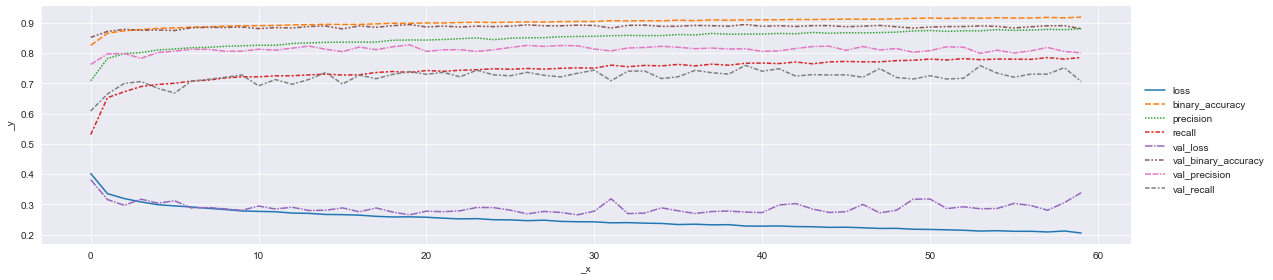

In [25]:
sns.relplot(data=pd.DataFrame(history.history), kind='line', height=4, aspect=4)
plt.show()

In [26]:
model02.evaluate([X_test, Y_test], Z_test)

69/69 [==============================] - 2s 21ms/step - loss: 0.2747 - binary_accuracy: 0.8940 - precision: 0.8127 - recall: 0.7576


[0.2747361958026886,
 0.8939629793167114,
 0.8127154111862183,
 0.7575865983963013]

In [27]:
Z_pred_02 = model02.predict([X_test, Y_test]).round().astype(int)

In [28]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Class - " + class_label)

In [29]:
import sklearn.metrics

In [30]:
labels=['NORM', 'MI', 'STTC', 'CD', 'HYP']

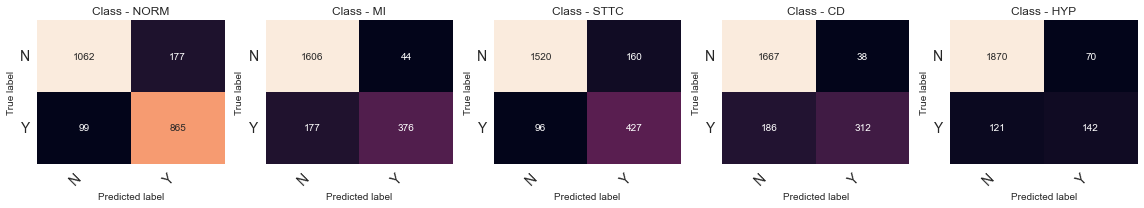

              precision    recall  f1-score   support

        NORM       0.83      0.90      0.86       964
          MI       0.90      0.68      0.77       553
        STTC       0.73      0.82      0.77       523
          CD       0.89      0.63      0.74       498
         HYP       0.67      0.54      0.60       263

   micro avg       0.81      0.76      0.78      2801
   macro avg       0.80      0.71      0.75      2801
weighted avg       0.82      0.76      0.78      2801
 samples avg       0.79      0.77      0.76      2801



In [32]:
fig, ax = plt.subplots(1, 5, figsize=(16, 3))
    
for axes, cfs_matrix, label in zip(ax.flatten(), sklearn.metrics.multilabel_confusion_matrix(Z_test, Z_pred_02), labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(Z_test, Z_pred_02, target_names=labels, zero_division=0))